# 1. Exploratory Data Analysis: Life Expectancy 


- This project was inspired by codeacademy's Life Expectancy (2000-2015) portfolio project.
- In this project the goals were to :
    - Discover trends
    - Clean and refine data using pandas
    - Create insightful visualization using matplotlib and seaborn


## Author
- **Corey Arrington**

## Profiles

- Linkedin: https://www.linkedin.com/in/corey-arrington-02499173/
- Github: https://github.com/CoreyArr/Data-Science-Projects

## 1.1 Import Libraries

In [1]:
import numpy as np # numerical python 
import pandas as pd # excel in python
import matplotlib.pyplot as plt # basic visuals
%matplotlib inline
import seaborn as sns # advanced visuals

## 1.2 Loading dataframe

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# 2. Early EDA

In [4]:
df.groupby('Country').Year.count()
#Each country appears 16 times.

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Year, dtype: int64

### 2.1 Identifying Key statistical data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


There are 96 rows, 4 columns, and 0 null values.

In [6]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## 2.2 Inspecting the Max Values

In [7]:
df.max()

Country                             Zimbabwe
Year                                    2015
Life expectancy at birth (years)          81
GDP                                 1.81e+13
dtype: object

In [8]:
df[df['Life expectancy at birth (years)']==81]

,Country,Year,Life expectancy at birth (years),GDP
47,Germany,2015,81.0,3.375610e+12


Germany achieved the highest life expectancy at 81 years, back in 2015.

In [9]:
df[df['GDP']==1.81e+13]

,Country,Year,Life expectancy at birth (years),GDP
79,United States of America,2015,79.3,1.810000e+13


America achieved the highest GDP at 1.810000e+13, back in 2015.

## 2.3 Inspecting the Min Value

In [10]:
df.min()

Country                                  Chile
Year                                      2000
Life expectancy at birth (years)          44.3
GDP                                 4.4157e+09
dtype: object

In [11]:
df[df['Life expectancy at birth (years)']==44.3]

,Country,Year,Life expectancy at birth (years),GDP
84,Zimbabwe,2004,44.3,5.805598e+09


Zimbabwe achieved the lowest life expectancy at 44 years, back in 2004.

In [12]:
df[df['GDP']<=4.5157e+09]

,Country,Year,Life expectancy at birth (years),GDP
88,Zimbabwe,2008,48.2,4.415703e+09


Zimbabwe achieved the lowest GDP in 2008.

# 3. Data Visualizations: Histogram Distribution

## 3.1 Histogram: Life Expectancy at Birth

Text(0.5, 1.0, 'Life Expectancy Distribution')

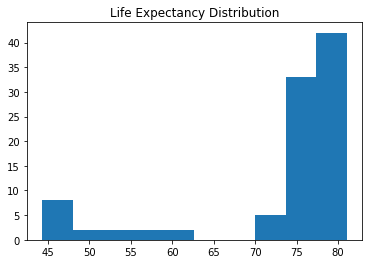

In [13]:
plt.hist(df['Life expectancy at birth (years)'])
plt.title('Life Expectancy Distribution')

## 3.2 Histogram: GDP

Text(0.5, 1.0, 'GDP Distribution')

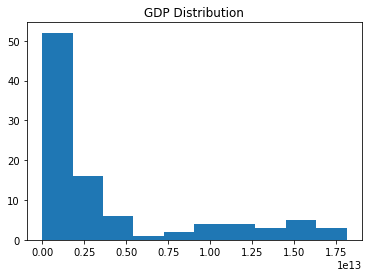

In [14]:
plt.hist(df.GDP)
plt.title('GDP Distribution')

# 4. Checking Column Correlations

In [15]:
corr_matrix = df.corr()
corr_matrix['Life expectancy at birth (years)'].sort_values(ascending=False)

Life expectancy at birth (years)    1.000000
GDP                                 0.343207
Year                                0.155050
Name: Life expectancy at birth (years), dtype: float64

# 4.1. Data Visualization: Heatmap (Correlation)


<AxesSubplot:>

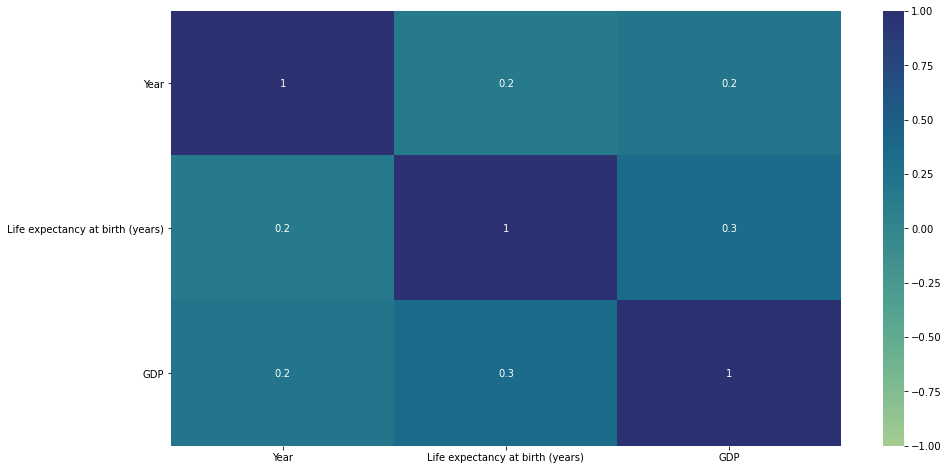

In [16]:
fig = plt.gcf()
fig.set_size_inches(15,8)
sns.heatmap(corr_matrix, annot = True, fmt = '.1g', vmin=-1, vmax=1, center =0, cmap='crest')

GDP and Year have a 34% and 15% correlation to Life Expectancy, respectively.

# 5. Indentifying Trends

In [17]:
means = df.groupby('Country').mean().reset_index()
means.drop(['Year'], axis=1, inplace=True)
means['Life expectancy at birth (years)'] = np.round(means['Life expectancy at birth (years)'],)
means

,Country,Life expectancy at birth (years),GDP
0,Chile,79.0,1.697888e+11
1,China,74.0,4.957714e+12
2,Germany,80.0,3.094776e+12
3,Mexico,76.0,9.766506e+11
4,United States of America,78.0,1.407500e+13
5,Zimbabwe,50.0,9.062580e+09


## 5.1 Data Visualization: Scatter Plot (Averages)

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy at birth (years)'>

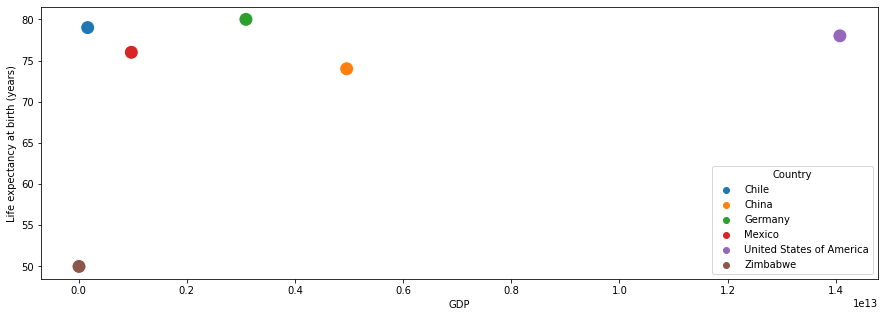

In [18]:
fig = plt.gcf()
fig.set_size_inches(15,5)
sns.scatterplot(
        data = means, x = 'GDP', y = 'Life expectancy at birth (years)', hue = 'Country', legend = 'auto', s=200
)

## 5. 2 Data Visualization: Line Plot (GDP)

Text(0.5, 1.0, 'GDP through the years')

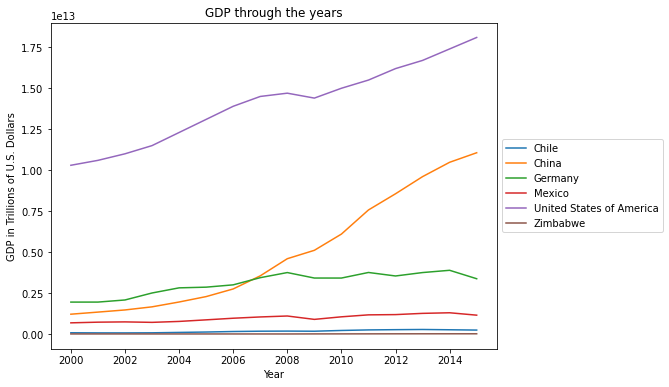

In [19]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='GDP', hue='Country', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.title('GDP through the years')


## 5. 3 Data Visualization: Line Plot (Life Expectancy)

Text(0.5, 1.0, 'Life Expectancy through the years')

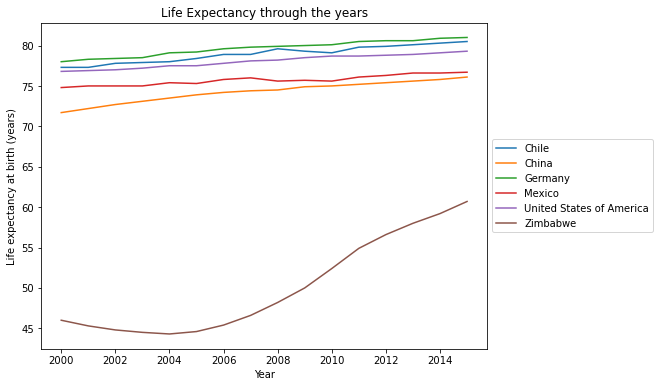

In [20]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life expectancy at birth (years)')
plt.title('Life Expectancy through the years')

The country with the lowest average GDP also has the lowest average Life Expectancy. However, the country with the highest average GDP doesn't have the highest average Life Expectancy.

# 6.  Data Visualizations: Bar Plots


Text(0.5, 1.0, 'Average Life Expactancy by Country')

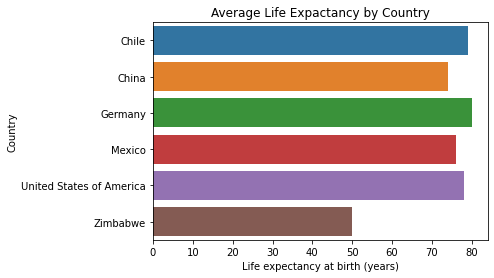

In [21]:
sns.barplot(x='Life expectancy at birth (years)', y='Country', data = means)
plt.title('Average Life Expactancy by Country')

Text(0.5, 1.0, 'Average GDP by Country')

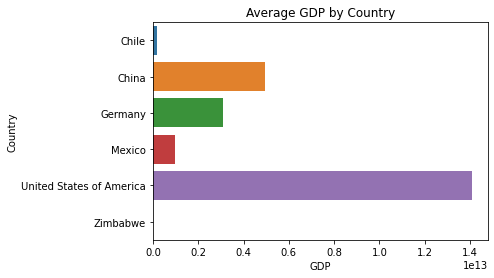

In [22]:
sns.barplot(x='GDP', y='Country', data = means)
plt.title('Average GDP by Country')

# 7. Data Visualization: Scatter Plots

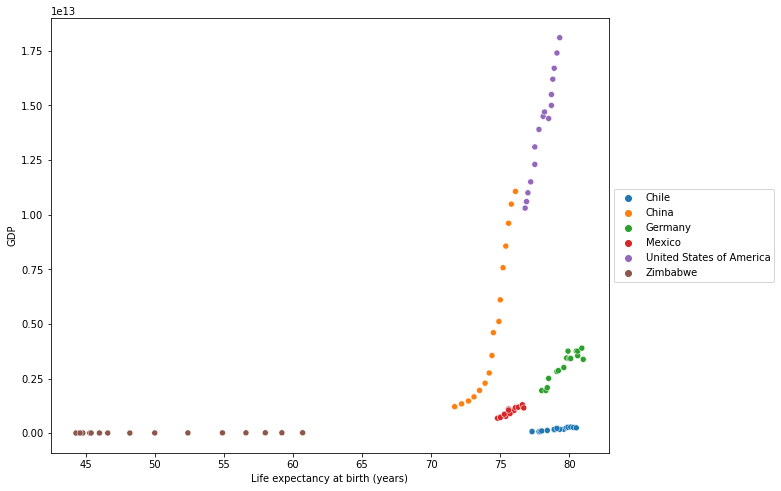

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Life expectancy at birth (years)', 
                y='GDP', hue='Country',
                data = df).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

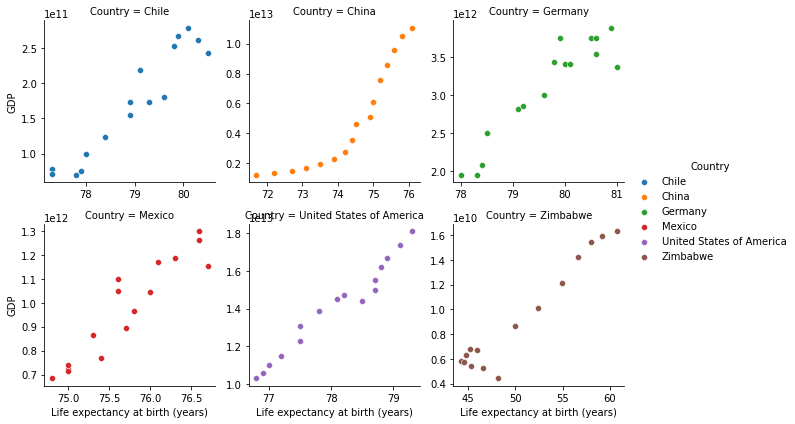

In [24]:
graph = sns.FacetGrid(df, col='Country', col_wrap=3,
                      hue = 'Country', sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,'Life expectancy at birth (years)', 'GDP')
         .add_legend()
         .set_axis_labels('Life expectancy at birth (years)', 'GDP'))

In [25]:
!jupyter nbconvert "life_expectancy_gdp" --to slides

[NbConvertApp] Converting notebook life_expectancy_gdp.ipynb to slides
[NbConvertApp] Writing 870624 bytes to life_expectancy_gdp.slides.html
